In [19]:
# import pandas liberary to load a csv data, perform operations on the data.
import pandas as pd

In [20]:
# load data into a variable
poly_data = pd.read_csv('cw1data.csv')

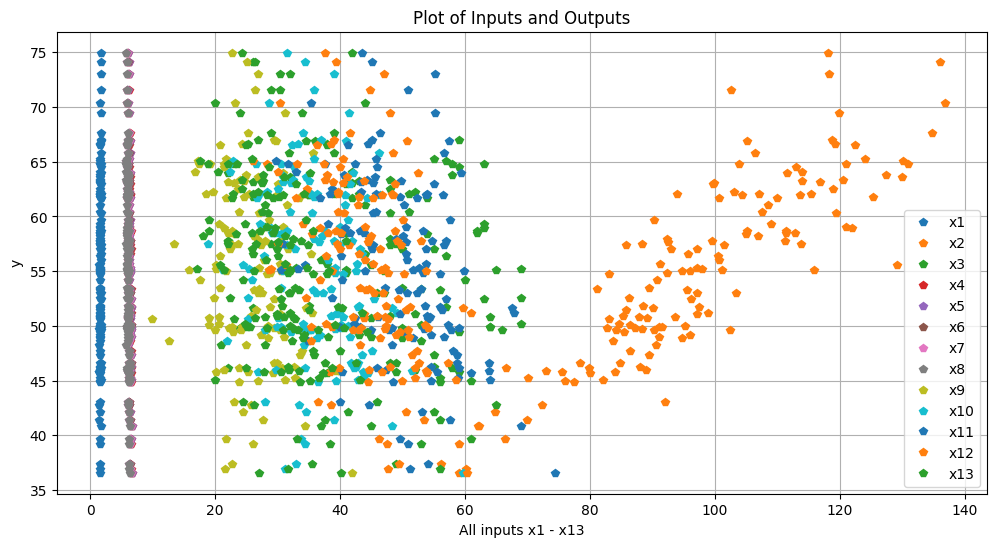

In [21]:
# Visualizing the data to get better understanding of Data
import matplotlib.pyplot as plt
# Plotting y against all x values
plt.figure(figsize=(12, 6))
[plt.plot(poly_data[col], poly_data['y'], marker='p', linestyle='', label=col) for col in poly_data.columns[1:]]

plt.xlabel('All inputs x1 - x13')
plt.ylabel('y')
plt.title('Plot of Inputs and Outputs')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# To visualize data in terms of rows and columns to get data understanding
poly_data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,49.83,1.68,82.8,24,6.554,6.538,6.438,6.390,6.318,29.44,39.83,59.10,54.11,40.72
1,50.12,1.71,86.5,53,6.593,6.578,6.465,6.420,6.356,19.11,40.19,57.34,53.60,39.24
2,49.02,1.65,91.0,45,6.488,6.466,6.360,6.313,6.251,31.00,41.56,56.69,50.99,38.08
3,61.70,1.69,100.7,42,6.361,6.334,6.209,6.160,6.087,33.39,44.33,52.26,45.33,29.23
4,40.83,1.72,62.3,37,6.667,6.644,6.539,6.491,6.417,34.33,48.35,69.03,62.02,44.97


In [23]:
# Checking Null values and data type
print(poly_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       135 non-null    float64
 1   x1      135 non-null    float64
 2   x2      135 non-null    float64
 3   x3      135 non-null    int64  
 4   x4      135 non-null    float64
 5   x5      135 non-null    float64
 6   x6      135 non-null    float64
 7   x7      135 non-null    float64
 8   x8      135 non-null    float64
 9   x9      135 non-null    float64
 10  x10     135 non-null    float64
 11  x11     135 non-null    float64
 12  x12     135 non-null    float64
 13  x13     135 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 14.9 KB
None


In [24]:
# Splitting Data as Input and Output by Assigning in to variables
X = poly_data.drop('y', axis=1)
y = poly_data['y']

<function matplotlib.pyplot.show(close=None, block=None)>

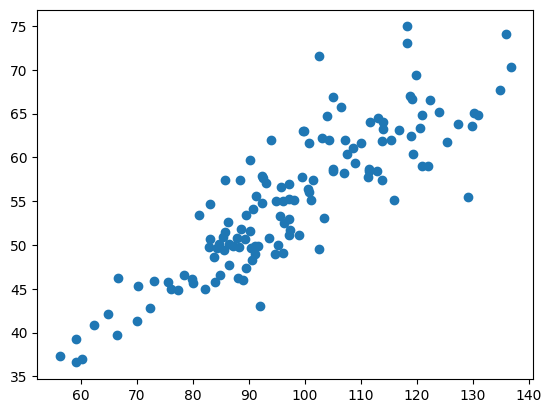

In [25]:
# ploting to know relationShip
plt.scatter(X['x2'], y)
plt.show

In [26]:
# Sliptting Data into 75% and 25% for taining and testing respectively for both input and output.

# for static selection from data
# seventy_five_per = (75*(y.shape[0]))//100

# X_train = X[:seventy_five_per]
# X_test = X[seventy_five_per:]

# y_train = y[:seventy_five_per]
# y_test = y[seventy_five_per:]


# For Randon Selection from Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [27]:
# Iam using Lasso regression for the data as i can see the inputs are has much defference among them
#Import lasso model from sklearn(regression) to make a model on the given data
from sklearn.linear_model import Lasso

# assinging variable to the model with penalty value alpha to reduce number of variable
poly_data_model = Lasso(alpha=0.1)

# now i gonna put training values to the model to get trained!
poly_data_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [28]:
# after training the model here iam predicting outputs for remaining data satored in x_text
y_preds = poly_data_model.predict(X_test)

In [29]:
# Pridiction Score or Accuracy in between prediction results and actual results
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_preds)
print(accuracy)

0.7862928894295089


In [30]:
# here iam displayong additional features to more idea about the model by importing metrics
from sklearn.metrics import mean_squared_error
print(f'Mean Square error for the Model = {mean_squared_error(y_test, y_preds)}') # cost function
print(f'Weights of the Variables are = {poly_data_model.coef_}') # Weights of variables
print(f'Intercept of the Equation = {poly_data_model.intercept_}') # Intercepts of the equation

Mean Square error for the Model = 16.80059346358468
Weights of the Variables are = [ 7.47361978e+00  3.50729580e-01 -4.96501046e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -3.25606113e-01
 -3.21360769e-01  4.25304935e-03  1.13056584e+00 -1.00981513e+00
 -2.59188178e-01]
Intercept of the Equation = 17.83221085255215


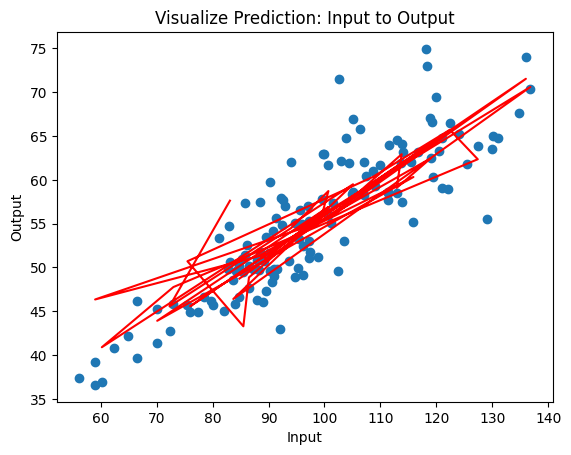

In [31]:
# Plot the original data and the regression line(prediction values for the given data )

plt.scatter(X['x2'], y)
plt.plot(X_test['x2'], y_preds, color='red')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Visualize Prediction: Input to Output')
plt.show()